 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



Optimal Distance:  20.0


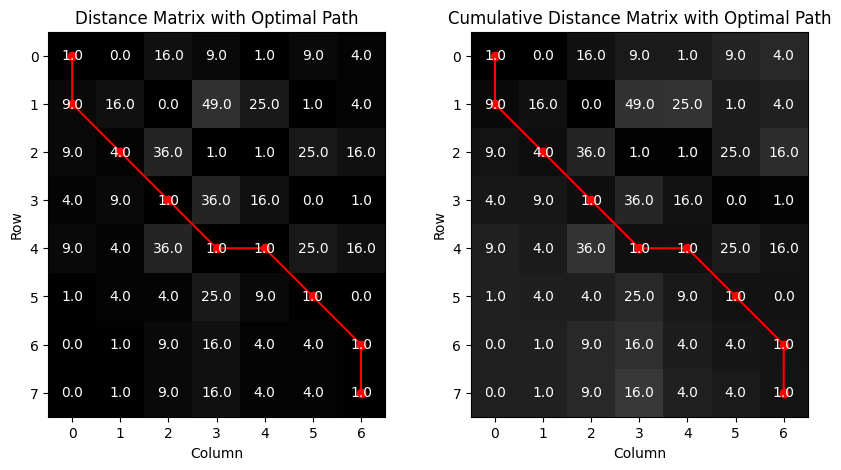

In [12]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################

def getPathFrom(cumulativeMatrix, i, j, Path):
    if i == 0 and j == 0:
        return Path
    if cumulativeMatrix[i,j-1] == min(cumulativeMatrix[i-1,j-1], cumulativeMatrix[i-1,j], cumulativeMatrix[i,j-1]):
        Path.append([i,j-1])
        return getPathFrom(cumulativeMatrix, i, j-1, Path)

    elif cumulativeMatrix[i-1,j-1] == min(cumulativeMatrix[i-1,j-1], cumulativeMatrix[i-1,j], cumulativeMatrix[i,j-1]):
        Path.append([i-1,j-1])
        return getPathFrom(cumulativeMatrix, i-1, j-1, Path)

    elif cumulativeMatrix[i-1,j] == min(cumulativeMatrix[i-1,j-1], cumulativeMatrix[i-1,j], cumulativeMatrix[i,j-1]):
        Path.append([i-1,j])
        return getPathFrom(cumulativeMatrix, i-1, j, Path)


def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    M = len(sequence1)
    N = len(sequence2)
    DTW_distance_Matrix = np.zeros((N,M)) #Distance matrix
    for i in range(N):
        for j in range(M):
            DTW_distance_Matrix[i,j] = (sequence1[j]-sequence2[i])**2

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((N+1,M+1))   #Cummulative distance matrix
    for i in range(N+1):
        DTW_cumulate_Matrix[i,0] = np.inf
    for j in range(M+1):
        DTW_cumulate_Matrix[0,j] = np.inf
    DTW_cumulate_Matrix[1,1] = DTW_distance_Matrix[0,0]
    for i in range(N):
        for j in range(M):
            if i==0 and j==0:
                continue
            current_distance = DTW_distance_Matrix[i,j]
            DTW_cumulate_Matrix[i+1,j+1] = current_distance + min(DTW_cumulate_Matrix[i,j+1],DTW_cumulate_Matrix[i,j],DTW_cumulate_Matrix[i+1,j])

    DTW_cumulate_Matrix = DTW_cumulate_Matrix[1:,1:]
    Path = []
    OptimalPath = getPathFrom(DTW_cumulate_Matrix, N-1, M-1, Path)
    OptimalPath.reverse()
    OptimalPath.append([N-1,M-1])
    optimalDistance = DTW_cumulate_Matrix[N-1,M-1]
    return DTW_distance_Matrix, DTW_cumulate_Matrix, OptimalPath, optimalDistance


def plotDTWpath(distanceMatrix, cumulateMatrix, optimal_path):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot distance matrix with optimal path
    ax[0].imshow(distanceMatrix, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    ax[0].set_xlabel('Column')
    ax[0].set_ylabel('Row')
    ax[0].set_title('Distance Matrix with Optimal Path')

    for i in range(distanceMatrix.shape[0]):
        for j in range(distanceMatrix.shape[1]):
            ax[0].text(j, i, str(distanceMatrix[i, j]), ha='center', va='center', color='white')

    path = np.array(optimal_path)
    ax[0].plot(path[:, 1], path[:, 0], color='red', marker='o', linestyle='-')

    # Plot cumulative matrix
    ax[1].imshow(cumulateMatrix, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    ax[1].set_xlabel('Column')
    ax[1].set_ylabel('Row')
    ax[1].set_title('Cumulative Distance Matrix with Optimal Path')

    for i in range(distanceMatrix.shape[0]):
        for j in range(distanceMatrix.shape[1]):
            ax[1].text(j, i, str(distanceMatrix[i, j]), ha='center', va='center', color='white')
    ax[1].plot(path[:, 1], path[:, 0], color='red', marker='o', linestyle='-')

    plt.show()


sequence1 = [4,3,7,0,2,6,5]
sequence2 = [3,7,1,6,1,5,4,4]
distanceMatrix,cumulateMatrix, Path, optimalDistance = DTW(sequence1, sequence2)
print("Optimal Distance: ", optimalDistance)
# Plot the distance matrix with the optimal path
plotDTWpath(distanceMatrix,cumulateMatrix, Path)



<b> Report your observations </b>

1. The DTW algorithm finds an optimal alignment path between the two sequences, indicating which points in one sequence correspond to which points in the other sequence.

2. The optimal path obtained in both the distance matrix and cumulate matrix are same.

3. The DTW algorithm deviates from a greedy approach, as it doesn't consistently select the most favorable path at each iteration. Rather, it operates on dynamic programming principles, employing recursion to iteratively compute optimal alignments.



<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


LINK TO DRIVE HAVING TDIGITS AND MY TRAINING AND TESTING DATA: https://drive.google.com/drive/folders/10Pw1U0e_wRk167EIdCjXekrLHTZz0w2g?usp=drive_link

LOCATION : /content/drive/MyDrive/PRML_Assignments/Assignment_5

Please add it to the mentioned location or change the desired location in the code

**Module to record the voice in online mode**

In [13]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# DO NOT UNCOMMENT AND RUN THESE CELLS AS THE RECORDING IS ALREADY DONE AND SAVED TO DRIVE


# from matplotlib import pyplot as plt
# import numpy as np
# import scipy.io.wavfile
# import io
# from google.colab import drive
# import os
# from IPython.display import Audio

# #### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
# # !rm digit_0.wav
# # !rm digit_1.wav
# # !rm digit_2.wav
# # !rm digit_3.wav
# # !rm digit_4.wav
# # !rm digit_5.wav
# # !rm digit_6.wav
# # !rm digit_7.wav
# # !rm digit_8.wav
# # !rm digit_9.wav

# def savingToDrive(filename, duration=2.0):
#     print("Recording digit:", filename[:-4])
#     wav = record(duration)
#     wav = wav.set_frame_rate(16000)
#     sig = wav.get_array_of_samples()
#     samples = np.array(sig).T.astype(np.float32)
#     fp_arr = np.array(samples).T.astype(np.float32)
#     fp_arr /= np.iinfo(sig.typecode).max
#     scipy.io.wavfile.write(filename, 16000, fp_arr)
#      # Copy the recorded file to Google Drive
#     target_path = '/content/drive/MyDrive/PRML_Assignments/Assignment_5/RecordedData/'
#     !cp $filename "$target_path"

# for i in range(10):
#     filename = f"digit_{i}.wav"
#     if os.path.isfile(filename):
#         print(f"Recording for digit {i} already exists.")
#     else:
#         savingToDrive(filename)

# # Display the recorded digits
# for i in range(10):
#     filename = f"digit_{i}.wav"
#     wn = Audio(filename, autoplay=False)
#     display(wn)



In [16]:
# DO NOT UNCOMMENT AND RUN THESE CELLS AS THE RECORDING IS ALREADY DONE AND SAVED TO DRIVE

# from matplotlib import pyplot as plt
# import numpy as np
# import scipy.io.wavfile
# import io
# import os
# from IPython.display import Audio

# # !rm digit_0_test1.wav
# # !rm digit_0_test2.wav
# # !rm digit_0_test3.wav
# # !rm digit_1_test1.wav
# # !rm digit_1_test2.wav
# # !rm digit_1_test3.wav
# # !rm digit_2_test1.wav
# # !rm digit_2_test2.wav
# # !rm digit_2_test3.wav
# # !rm digit_3_test1.wav
# # !rm digit_3_test2.wav
# # !rm digit_3_test3.wav
# # !rm digit_4_test1.wav
# # !rm digit_4_test2.wav
# # !rm digit_4_test3.wav
# # !rm digit_5_test1.wav
# # !rm digit_5_test2.wav
# # !rm digit_5_test3.wav
# # !rm digit_6_test1.wav
# # !rm digit_6_test2.wav
# # !rm digit_6_test3.wav
# # !rm digit_7_test1.wav
# # !rm digit_7_test2.wav
# # !rm digit_7_test3.wav
# # !rm digit_8_test1.wav
# # !rm digit_8_test2.wav
# # !rm digit_8_test3.wav
# # !rm digit_9_test1.wav
# # !rm digit_9_test2.wav
# # !rm digit_9_test3.wav

# for i in range(10):
#     filename1 = f"digit_{i}_test1.wav"
#     filename2 = f"digit_{i}_test2.wav"
#     filename3 = f"digit_{i}_test3.wav"
#     if os.path.isfile(filename1) or os.path.isfile(filename2) or os.path.isfile(filename3):
#         print(f"Recording for digit {i} already exists.")
#     else:
#         savingToDrive(filename1)
#         savingToDrive(filename2)
#         savingToDrive(filename3)

# # # Display the recorded digits
# # for i in range(10):
# #     filename1 = f"digit_{i}_test1.wav"
# #     filename2 = f"digit_{i}_test2.wav"
# #     filename3 = f"digit_{i}_test3.wav"
# #     wn = Audio(filename1, autoplay=False)
# #     display(wn)
# #     wn = Audio(filename2, autoplay=False)
# #     display(wn)
# #     wn = Audio(filename3, autoplay=False)
# #     display(wn)


In [17]:
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import os

Training = []
Testing = []
path = '/content/drive/MyDrive/PRML_Assignments/Assignment_5/RecordedData/'

# Iterate through files in the RecordedData folder
for filename in os.listdir(path):
        # Check if the file is a training or testing file
        if filename.endswith('test1.wav') or filename.endswith('test2.wav') or filename.endswith('test3.wav'):
            Testing.append(os.path.join(path, filename))
        elif filename.endswith('.wav'):
            Training.append(os.path.join(path, filename))

featuredTraining = []
for i in range(len(Training)):
    (rate,sig) = wav.read(Training[i])
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    featuredTraining.append(mfcc_feat_cmvn)

featuredTesting = []
for i in range(len(Testing)):
    (rate,sig) = wav.read(Testing[i])
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    featuredTesting.append(mfcc_feat_cmvn)


In [18]:
def digitRecognitionSystem(Training, testSample):
    minDist = np.inf
    digit = -1
    for i in range(10):
        _,_,_,optimalDist = vectorDTW(Training[i], testSample)
        if optimalDist < minDist:
            minDist = optimalDist
            digit = i
    return digit

**Algorithm to perform isolated digit recognition**

In [19]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################
    N = len(template1)
    M = len(template2)
    DTW_distance_Matrix = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            template1[i] = np.array(template1[i])
            template2[j] = np.array(template2[j])
            DTW_distance_Matrix[i,j] = 1/len(template1[i]) * (np.sum((template1[i] - template2[j])**2))
    DTW_cumulate_Matrix = np.zeros((N+1,M+1))   #Cummulative distance matrix
    for i in range(N+1):
        DTW_cumulate_Matrix[i,0] = np.inf
    for j in range(M+1):
        DTW_cumulate_Matrix[0,j] = np.inf
    DTW_cumulate_Matrix[1,1] = DTW_distance_Matrix[0,0]
    for i in range(N):
        for j in range(M):
            if i==0 and j==0:
                continue
            current_distance = DTW_distance_Matrix[i,j]
            DTW_cumulate_Matrix[i+1,j+1] = current_distance + min(DTW_cumulate_Matrix[i,j+1],DTW_cumulate_Matrix[i,j],DTW_cumulate_Matrix[i+1,j])

    DTW_cumulate_Matrix = DTW_cumulate_Matrix[1:,1:]
    optimalDistance = DTW_cumulate_Matrix[N-1,M-1]

    i = N-1
    j = M-1
    Path = []
    while True:
        if i == 0 and j == 0:
            break
        elif i == 0:
            Path.append([i, j - 1])
            j = j - 1
        elif j == 0:
            Path.append([i - 1, j])
            i = i - 1
        elif DTW_cumulate_Matrix[i,j-1] == min(DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i,j-1]):
            Path.append([i,j-1])
            j = j -1
        elif DTW_cumulate_Matrix[i-1,j-1] == min(DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i,j-1]):
            Path.append([i-1,j-1])
            i = i - 1
            j = j - 1
        elif DTW_cumulate_Matrix[i-1,j] == min(DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i,j-1]):
            Path.append([i-1,j])
            i = i - 1

    Path.reverse()
    Path.append([N-1,M-1])

    return DTW_distance_Matrix, DTW_cumulate_Matrix ,Path, optimalDistance

def plotvectorDTWpath(distanceMatrix, cumulateMatrix, optimal_path):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot distance matrix with optimal path
    ax[0].imshow(distanceMatrix, cmap='Blues', interpolation='nearest')
    ax[0].set_xlabel('Column')
    ax[0].set_ylabel('Row')
    ax[0].set_title('Distance Matrix with Optimal Path')

    path = np.array(optimal_path)
    ax[0].plot(path[:, 1], path[:, 0], color='red', marker='o', linestyle='-')

    # Plot cumulative matrix
    ax[1].imshow(cumulateMatrix, cmap='Blues', interpolation='nearest')
    ax[1].set_xlabel('Column')
    ax[1].set_ylabel('Row')
    ax[1].set_title('Cumulative Distance Matrix with Optimal Path')
    ax[1].plot(path[:, 1], path[:, 0], color='red', marker='o', linestyle='-')

    plt.show()


**Plot the optimal DTW path**

True Digit: 1 , Test Digit: 1


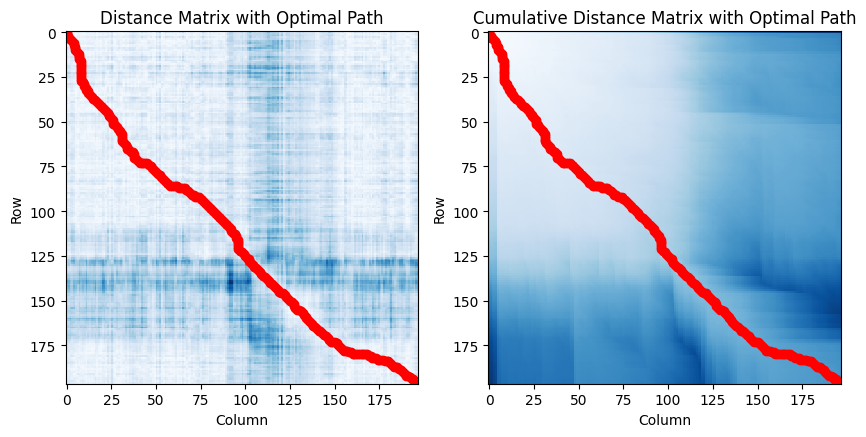

Optimal Distance : 50450.99222506002
True Digit: 1 , Test Digit: 7


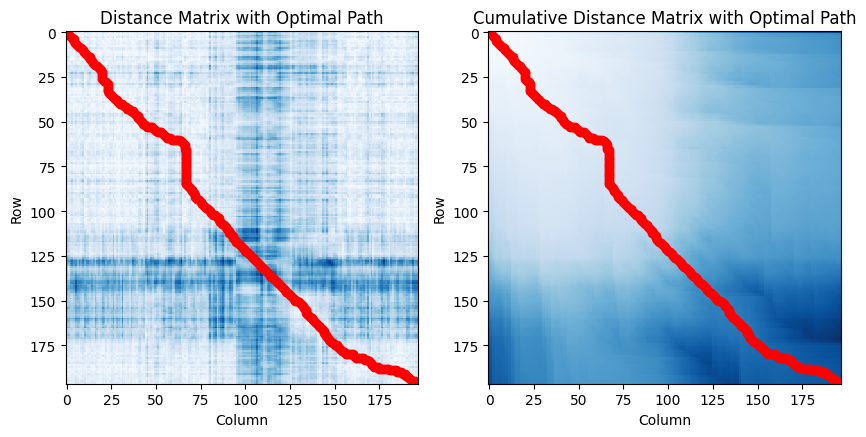

Optimal Distance : 74873.56745558519


In [20]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

distanceMatrix1, cumulateMatrix1, path1, optimalDistance1 = vectorDTW(featuredTraining[1], featuredTesting[4])
distanceMatrix2, cumulateMatrix2, path2, optimalDistance2 = vectorDTW(featuredTraining[1], featuredTesting[22])
print("True Digit: 1 , Test Digit: 1")
plotvectorDTWpath(distanceMatrix1, cumulateMatrix1, path1)
print("Optimal Distance :",optimalDistance1)
print("True Digit: 1 , Test Digit: 7")
plotvectorDTWpath(distanceMatrix2, cumulateMatrix2, path2)
print("Optimal Distance :",optimalDistance2)


**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

Digit Recognition Accuracy for 0:  100.0 %
Digit Recognition Accuracy for 1:  100.0 %
Digit Recognition Accuracy for 2:  100.0 %
Digit Recognition Accuracy for 3:  100.0 %
Digit Recognition Accuracy for 4:  100.0 %
Digit Recognition Accuracy for 5:  100.0 %
Digit Recognition Accuracy for 6:  66.66666666666666 %
Digit Recognition Accuracy for 7:  100.0 %
Digit Recognition Accuracy for 8:  100.0 %
Digit Recognition Accuracy for 9:  100.0 %
Overall Accuracy of the System: 96.66666666666667 %


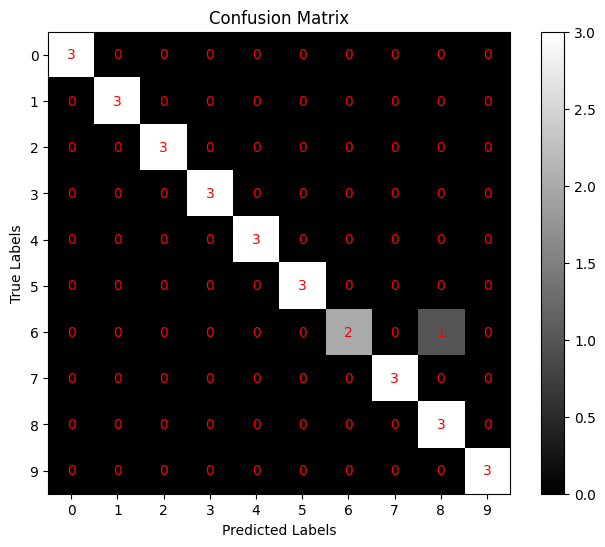

True digit: 6, Predicted as: 8, Count: 1


In [21]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def digitRecognitionAccuracy(preds, actual):
    count = 0
    for i in range(len(preds)):
        if preds[i] == actual[i]:
            count+=1
    return 100*(count/len(preds))

Actual = []
for i in range(10):
    Actual.append(i)
    Actual.append(i)
    Actual.append(i)
Preds = []
for i in range(10):
    Preds.append(digitRecognitionSystem(featuredTraining, featuredTesting[3*i]))
    Preds.append(digitRecognitionSystem(featuredTraining, featuredTesting[3*i+1]))
    Preds.append(digitRecognitionSystem(featuredTraining, featuredTesting[3*i+2]))
    print(f"Digit Recognition Accuracy for {i}: ", digitRecognitionAccuracy(Preds[3*i:3*(i+1)],Actual[3*i: 3*(i+1)]), "%")

print("Overall Accuracy of the System:" , digitRecognitionAccuracy(Preds, Actual), "%")

# Initialize confusion matrix
confusionMatrix = [[0]*10 for _ in range(10)]

# Fill confusion matrix
for true, pred in zip(Actual, Preds):
    confusionMatrix[true][pred] += 1

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusionMatrix,cmap = 'gray', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=range(10), labels=range(10))
plt.yticks(ticks=range(10), labels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
confusionMatrix = np.array(confusionMatrix)
for i in range(confusionMatrix.shape[0]):
    for j in range(confusionMatrix.shape[1]):
        plt.text(j, i, str(confusionMatrix[i, j]), ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.show()


most_confusing_indices = np.where(confusionMatrix == np.max(confusionMatrix[np.nonzero(np.eye(10) == 0)]))
true_labels = most_confusing_indices[0]
predicted_labels = most_confusing_indices[1]

# Print the most confusing digits
for i in range(len(true_labels)):
    print(f"True digit: {true_labels[i]}, Predicted as: {predicted_labels[i]}, Count: {confusionMatrix[true_labels[i], predicted_labels[i]]}")


<b> Report your observations </b>

1. The accuracy obtained in digit recognition using DTW is very high.

2. When the reference and test signals represent the same digit, the optimal distance is significantly smaller compared to when they represent different digits. Additionally, the optimal paths obtained in both cases are distinct.

3. Confusion matrix helps to understand the most confusing digits and for my dataset the most confusing digit is 6 as it is predicted as 8.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [28]:
# Required imports
from google.colab import drive
import numpy as np
import os
!pip -q install python_speech_features
!pip -q install speechpy
import scipy.io.wavfile
from python_speech_features import mfcc
import speechpy

# Define data path
datapath = "/content/drive/MyDrive/PRML_Assignments/Assignment_5/MultiSpeakerDigitData_modified"

# Function to extract MFCC coefficients from a .wav file
def extract_mfcc(wav_file):
    rate, sig = scipy.io.wavfile.read(wav_file)
    sig = sig - np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
    return mfcc_feat_cmvn

# Lists to store MFCC coefficients for each speaker
speakers = ['jackson', 'nicolas', 'theo', 'yweweler']
speakerData = {speaker: [] for speaker in speakers}
sortedFilenames = {speaker: [] for speaker in speakers}
# Iterate through folders and files
for speaker_folder in os.listdir(datapath):
    speaker_path = os.path.join(datapath, speaker_folder)
    if os.path.isdir(speaker_path):
        for filename in os.listdir(speaker_path):
            if filename.endswith(".wav"):
                sortedFilenames[speaker_folder].append(os.path.join(speaker_path, filename))
        sortedFilenames[speaker_folder].sort(key = lambda x : x.split(f'_{speaker_folder}_')[0])

for speaker in speakers:
    for file in sortedFilenames[speaker]:
        mfcc_features = extract_mfcc(file)
        speakerData[speaker].append(mfcc_features)


jacksonTrain = speakerData['jackson'][::50]
nicolasTrain = speakerData['nicolas'][::50]
theoTrain = speakerData['theo'][::50]
ywewelerTrain = speakerData['yweweler'][::50]

jacksonTest = []
nicolasTest = []
theoTest = []
ywewelerTest = []
# print(len(speakerData['jackson'][50*2+1]))
for i in range(10):
    for j in range(1,11):
        jacksonTest.append(speakerData['jackson'][50*i+j])
        nicolasTest.append(speakerData['nicolas'][50*i+j])
        theoTest.append(speakerData['theo'][50*i+j])
        ywewelerTest.append(speakerData['yweweler'][50*i+j])


In [26]:
## Evaluation of Digit recognition System for TDIGITS dataset

Actual = []
for j in range(4):
    for i in range(10):
        for k in range(10):
            Actual.append(i)
Preds = []
print("Reference Signal: Self Recorded")
for i in range(100):
    Preds.append(digitRecognitionSystem(featuredTraining,jacksonTest[i]))
print("Accuracy for speaker Jackson: ",digitRecognitionAccuracy(Preds[:100], Actual[:100]),"%" )
for i in range(100):
    Preds.append(digitRecognitionSystem(featuredTraining,nicolasTest[i]))
print("Accuracy for speaker Nicolas: ",digitRecognitionAccuracy(Preds[100:200], Actual[:100]),"%" )
for i in range(100):
    Preds.append(digitRecognitionSystem(featuredTraining,theoTest[i]))
print("Accuracy for speaker Theo: ",digitRecognitionAccuracy(Preds[200:300], Actual[:100]),"%" )
for i in range(100):
    Preds.append(digitRecognitionSystem(featuredTraining,ywewelerTest[i]))
print("Accuracy for speaker Yweweler: ",digitRecognitionAccuracy(Preds[300:], Actual[:100]),"%" )

print("Overall Accuracy: ",digitRecognitionAccuracy(Preds, Actual),"%")




Reference Signal: Self Recorded
Accuracy for speaker Jackson:  13.0 %
Accuracy for speaker Nicolas:  32.0 %
Accuracy for speaker Theo:  25.0 %
Accuracy for speaker Yweweler:  38.0 %
Overall Accuracy:  27.0 %


In [27]:
## Evaluation of performance when both signals are from same speaker

print("Case 1 : When both templates from same Speaker")

Actual = []
for j in range(4):
    for i in range(10):
        for k in range(10):
            Actual.append(i)
Preds = []
for i in range(100):
    Preds.append(digitRecognitionSystem(jacksonTrain,jacksonTest[i]))
print("Accuracy for speaker Jackson: ",digitRecognitionAccuracy(Preds[:100], Actual[:100]),"%" )
for i in range(100):
    Preds.append(digitRecognitionSystem(nicolasTrain,nicolasTest[i]))
print("Accuracy for speaker Nicolas: ",digitRecognitionAccuracy(Preds[100:200], Actual[:100]),"%" )
for i in range(100):
    Preds.append(digitRecognitionSystem(theoTrain,theoTest[i]))
print("Accuracy for speaker Theo: ",digitRecognitionAccuracy(Preds[200:300], Actual[:100]),"%" )
for i in range(100):
    Preds.append(digitRecognitionSystem(ywewelerTrain,ywewelerTest[i]))
print("Accuracy for speaker Yweweler: ",digitRecognitionAccuracy(Preds[300:], Actual[:100]),"%" )

print("Overall Accuracy: ",digitRecognitionAccuracy(Preds, Actual),"%")



Case 1 : When both templates from same Speaker
Accuracy for speaker Jackson:  90.0 %
Accuracy for speaker Nicolas:  84.0 %
Accuracy for speaker Theo:  82.0 %
Accuracy for speaker Yweweler:  79.0 %
Overall Accuracy:  83.75 %


In [25]:
## Evaluation of performance when both signals are from Different speaker

print("Case 2 : When both templates from different Speaker")

Actual = []
for j in range(12):
    for i in range(10):
        for k in range(10):
            Actual.append(i)
Preds = []
print("Case 2a : Reference Signal: Jackson , Test Signal: Nicolas")
for i in range(100):
    Preds.append(digitRecognitionSystem(jacksonTrain,nicolasTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[:100], Actual[:100]),"%" )

print("Case 2b : Reference Signal: Jackson , Test Signal: Theo")
for i in range(100):
    Preds.append(digitRecognitionSystem(jacksonTrain,theoTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[100:200], Actual[:100]),"%" )

print("Case 2c : Reference Signal: Jackson , Test Signal: Yweweler")
for i in range(100):
    Preds.append(digitRecognitionSystem(jacksonTrain,ywewelerTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[200:300], Actual[:100]),"%" )

print("Case 2d : Reference Signal: Theo , Test Signal: Nicolas")
for i in range(100):
    Preds.append(digitRecognitionSystem(theoTrain,nicolasTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[300:400], Actual[:100]),"%" )

print("Case 2e : Reference Signal: Theo , Test Signal: Jackson")
for i in range(100):
    Preds.append(digitRecognitionSystem(theoTrain,jacksonTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[400:500], Actual[:100]),"%" )

print("Case 2f : Reference Signal: Theo , Test Signal: Yweweler")
for i in range(100):
    Preds.append(digitRecognitionSystem(theoTrain,ywewelerTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[500:600], Actual[:100]),"%" )

print("Case 2g : Reference Signal: Nicolas , Test Signal: Jackson")
for i in range(100):
    Preds.append(digitRecognitionSystem(nicolasTrain,jacksonTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[600:700], Actual[:100]),"%" )

print("Case 2h : Reference Signal: Nicolas , Test Signal: Theo")
for i in range(100):
    Preds.append(digitRecognitionSystem(nicolasTrain,theoTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[700:800], Actual[:100]),"%" )

print("Case 2i : Reference Signal: Nicolas , Test Signal: Yweweler")
for i in range(100):
    Preds.append(digitRecognitionSystem(nicolasTrain,ywewelerTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[800:900], Actual[:100]),"%" )

print("Case 2j : Reference Signal: Yweweler , Test Signal: Nicolas")
for i in range(100):
    Preds.append(digitRecognitionSystem(ywewelerTrain,nicolasTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[900:1000], Actual[:100]),"%" )

print("Case 2k : Reference Signal: Yweweler , Test Signal: Theo")
for i in range(100):
    Preds.append(digitRecognitionSystem(ywewelerTrain,theoTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[1000:1100], Actual[:100]),"%" )

print("Case 2l : Reference Signal: Yweweler , Test Signal: Jackson")
for i in range(100):
    Preds.append(digitRecognitionSystem(ywewelerTrain,jacksonTest[i]))
print("Accuracy: ",digitRecognitionAccuracy(Preds[1100:1200], Actual[:100]),"%" )


print("Overall Accuracy: ",digitRecognitionAccuracy(Preds, Actual),"%")



Case 2 : When both templates from different Speaker
Case 2a : Reference Signal: Jackson , Test Signal: Nicolas
Accuracy:  23.0 %
Case 2b : Reference Signal: Jackson , Test Signal: Theo
Accuracy:  47.0 %
Case 2c : Reference Signal: Jackson , Test Signal: Yweweler
Accuracy:  28.999999999999996 %
Case 2d : Reference Signal: Theo , Test Signal: Nicolas
Accuracy:  35.0 %
Case 2e : Reference Signal: Theo , Test Signal: Jackson
Accuracy:  67.0 %
Case 2f : Reference Signal: Theo , Test Signal: Yweweler
Accuracy:  26.0 %
Case 2g : Reference Signal: Nicolas , Test Signal: Jackson
Accuracy:  28.999999999999996 %
Case 2h : Reference Signal: Nicolas , Test Signal: Theo
Accuracy:  50.0 %
Case 2i : Reference Signal: Nicolas , Test Signal: Yweweler
Accuracy:  54.0 %
Case 2j : Reference Signal: Yweweler , Test Signal: Nicolas
Accuracy:  30.0 %
Case 2k : Reference Signal: Yweweler , Test Signal: Theo
Accuracy:  42.0 %
Case 2l : Reference Signal: Yweweler , Test Signal: Jackson
Accuracy:  44.0 %
Overall 

<b>Changes to improve System Performance</b>

1. Feature Representation Optimization:
Experiment with different configurations of MFCC features, such as varying the number of cepstral coefficients, the number of Mel frequency bins, and the size of the analysis window.

2. Dynamic Time Warping Variants:
Explore variations of DTW tailored for speech recognition tasks. For example, you could try variants like fast DTW, multilevel DTW, or weighted DTW, which are optimized for efficiency or robustness in different scenarios.

3. Temporal Context:
Incorporate temporal context into your feature representation by including delta and delta-delta coefficients alongside the MFCCs. These higher-order derivatives capture information about the rate of change of the MFCCs over time and can improve the discrimination power of your features.

4. Normalization and Standardization:
Normalize or standardize the MFCC features to ensure consistency and robustness across different utterances and speakers. Techniques like mean normalization or z-score normalization can help mitigate the effects of variations in recording conditions and speaker characteristics.

5. Data Augmentation:
Augment your training dataset by applying time-warping, pitch-shifting, or background noise addition to the speech recordings. Data augmentation increases the diversity of your training data and helps the model generalize better to unseen variations in speech.

6. Model Fusion:
Combine DTW with other recognition models, such as Hidden Markov Models (HMMs), Gaussian Mixture Models (GMMs), or neural networks, using techniques like model fusion or hybrid approaches. Fusion of complementary models can leverage the strengths of each model and improve overall performance.

7. Speaker Adaptation:
Incorporate speaker adaptation techniques to adapt the DTW model to specific speakers or speaker groups. Techniques like Maximum Likelihood Linear Regression (MLLR) or feature space Maximum Likelihood Linear Regression (fMLLR) can help account for inter-speaker variability and improve recognition accuracy.

8. Language Models:
Integrate language models or grammar constraints into the recognition process to improve the recognition accuracy of spoken digits. Language models capture the statistical dependencies between digits and can help resolve ambiguities in recognition.

9. Optimization Techniques:
Employ optimization techniques such as stochastic gradient descent (SGD), AdaGrad, or Adam to train the DTW model more efficiently and effectively. Experiment with different optimization algorithms and learning rates to find the optimal training strategy.

10. Evaluation Metrics:
Use appropriate evaluation metrics such as Word Error Rate (WER) or phoneme error rate to assess the performance of your speech recognition system accurately. These metrics provide insights into the system's ability to recognize spoken digits and can guide further improvements.

<b> Report your observations </b>

1. The accuracy of the recognition system notably increases when the reference and test signals come from the same speaker, in contrast to scenarios where they stem from different speakers. This suggests that the system performs better at recognizing speech patterns and characteristics consistent with a single speaker's voice, compared to handling variations introduced by different speakers.

2. There is typically lower variability in speech patterns and acoustic features within the same speaker's utterances. This reduced variability simplifies the alignment process and enhances recognition accuracy.

3. Recognition models trained on data from the same speaker tend to generalize more effectively to test signals from the same speaker. This is because the models have already learned the specific voice characteristics and speaking style of that speaker during training.

4. There is typically higher acoustic variability across different speakers, including variations in background noise, recording conditions, and microphone characteristics. This variability can degrade recognition performance by introducing additional sources of distortion and mismatch.

5. Recognition models trained on data from one speaker may struggle to generalize effectively to test signals from different speakers. The models may not have learned the diverse voice characteristics and speaking styles of other speakers during training, leading to reduced recognition accuracy.
